In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('NSL_KDD_bayesian_enc_training_set.csv')
test = pd.read_csv('NSL_KDD_bayesian_enc_testing_set.csv')

In [2]:
x1 = train.iloc[:,1:41]
y1 = train['label']
print(x1)
print(y1)

        src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0             491          0     0               0       0    0   
1             146          0     0               0       0    0   
2               0          0     0               0       0    0   
3             232       8153     0               0       0    0   
4             199        420     0               0       0    0   
...           ...        ...   ...             ...     ...  ...   
125968          0          0     0               0       0    0   
125969        105        145     0               0       0    0   
125970       2231        384     0               0       0    0   
125971          0          0     0               0       0    0   
125972        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  root_shell  ...  \
0                       0          0                0           0  ...   
1                       0          0           

In [3]:
x2 = test.iloc[:,1:41]
y2 = test['label']
print(x2)
print(y2)

       src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0          0     0               0       0    0   
1              0          0     0               0       0    0   
2          12983          0     0               0       0    0   
3             20          0     0               0       0    0   
4              0         15     0               0       0    0   
...          ...        ...   ...             ...     ...  ...   
22539        794        333     0               0       0    0   
22540        317        938     0               0       0    0   
22541      54540       8314     0               0       0    2   
22542         42         42     0               0       0    0   
22543          0          0     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  root_shell  ...  \
0                      0          0                0           0  ...   
1                      0          0                0         

In [4]:
train["label"].value_counts()

0    67343
1    58630
Name: label, dtype: int64

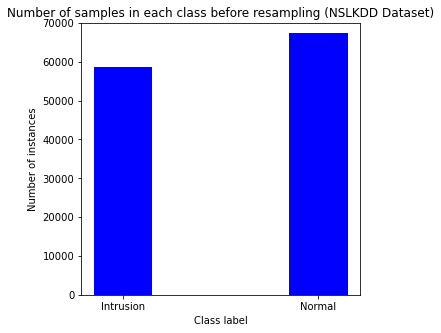

In [5]:
from matplotlib import pyplot as plt
data1 = {'Intrusion':58630, 'Normal':67343}
Class_label = list(data1.keys())
Number_of_instances = list(data1.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 70000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class before resampling (NSLKDD Dataset)")
plt.show()

In [6]:
# RESAMPLING

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_sample(x1, y1) 

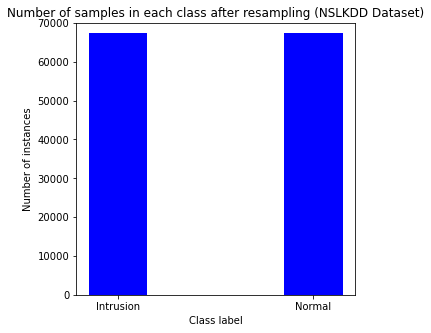

In [73]:
data2 = {'Intrusion':67343, 'Normal':67343}
Class_label = list(data2.keys())
Number_of_instances = list(data2.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 70000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class after resampling (NSLKDD Dataset)")
plt.show()

In [8]:
# NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
model.fit(x1)
x1 = model.transform(x1)
x2 = model.transform(x2)

In [9]:
# 1. XGBOOST CLASSIFIER MODEL

from xgboost import XGBClassifier
import xgboost as xgb
params = {
           'learning_rate': 0.1,
        'n_estimators':381,
        'max_depth':5,
        'min_child_weight':8,
        'gamma':0.0,
        'reg_alpha' : 0.005,
        'subsample':0.9,
        'colsample_bytree':0.6,
        'objective': 'binary:logistic',
        'nthread':4,
        'scale_pos_weight':1,
        'seed':27
         }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x1, y1)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=381, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0.005, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [10]:
y_pred_xgb=xgb_clf.predict(x2)
print(y_pred_xgb)

[1 1 0 ... 1 0 1]


In [11]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_xgb)
print('ROC AUC: %f' % auc)

ROC AUC: 0.819107


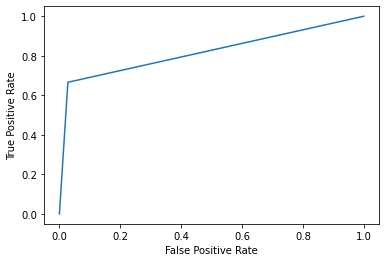

In [12]:
from matplotlib import pyplot as plt
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_xgb)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Accuracy in XGBoost classifier model = ', metrics.accuracy_score(y2, y_pred_xgb)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y2, y_pred_xgb, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y2, y_pred_xgb, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y2, y_pred_xgb, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y2, y_pred_xgb, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y2, y_pred_xgb, average='macro'))

Accuracy in XGBoost classifier model =  79.79063165365507
Confusion Matrix = [[9441  270]
 [4286 8547]]
Recall = 0.7979063165365508
Precision = 0.8480722396909933
Classification Report =
               precision    recall  f1-score   support

           0       0.69      0.97      0.81      9711
           1       0.97      0.67      0.79     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

F1 Score =  0.7975880072372159


<AxesSubplot:>

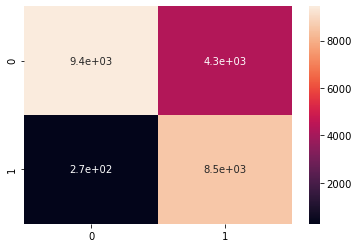

In [14]:
cm_xgb = metrics.confusion_matrix(y_pred_xgb, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_xgb, annot=True)

<AxesSubplot:>

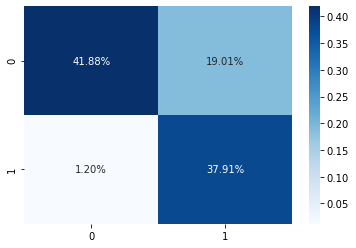

In [15]:
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot=True, 
            fmt='.2%', cmap='Blues')

In [16]:
# 2. DNN CLASSIFIER MODEL

from tensorflow import keras
model_DNN=keras.models.Sequential()
model_DNN.add(keras.layers.Dense(units=40, activation = "relu",input_shape = x1.shape[1:]))
model_DNN.add(keras.layers.Dense(units=80,activation = "relu"))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=160,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=160,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=320,activation = "relu" ))
model_DNN.add(keras.layers.Dense(units=2, activation = "sigmoid"))
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 80)                3280      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 160)               12960     
                                                                 
 dropout_1 (Dropout)         (None, 160)               0         
                                                                 
 dense_3 (Dense)             (None, 160)               25760     
                                                                 
 dropout_2 (Dropout)         (None, 160)               0

In [18]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_DNN.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaDNNNet.h5",monitor='val_loss')
history = model_DNN.fit(x1,y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [x2, y2])
testloss,testaccuracy=model_DNN.evaluate(x2,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
8418/8418 [==============================] - 42s 5ms/step - loss: 0.1603 - accuracy: 0.9698 - val_loss: 0.9659 - val_accuracy: 0.7408
Epoch 2/50
8418/8418 [==============================] - 36s 4ms/step - loss: 0.1233 - accuracy: 0.9663 - val_loss: 12.6745 - val_accuracy: 0.7577
Epoch 3/50
8418/8418 [==============================] - 34s 4ms/step - loss: 0.1111 - accuracy: 0.9679 - val_loss: 1.3624 - val_accuracy: 0.7638
Epoch 4/50
8418/8418 [==============================] - 34s 4ms/step - loss: 0.1150 - accuracy: 0.9713 - val_loss: 3.4994 - val_accuracy: 0.8058
Epoch 5/50
8418/8418 [==============================] - 34s 4ms/step - loss: 0.1079 - accuracy: 0.9717 - val_loss: 1.3353 - val_accuracy: 0.7785
Epoch 6/50
8418/8418 [==============================] - 33s 4ms/step - loss: 0.1205 - accuracy: 0.9717 - val_loss: 1.2546 - val_accuracy: 0.7486
Epoch 7/50
8418/8418 [==============================] - 34s 4ms/step - loss: 0.1497 - accuracy: 0.9712 - val_loss: 4.6941 - val_a

In [19]:
y_predicted_DNN = model_DNN.predict(x2)
y_predicted_class_DNN=np.argmax(y_predicted_DNN,axis=1)
print(y_predicted_class_DNN)
print("Test Loss =",testloss)
print("Test Accuracy =",testaccuracy)

[1 1 0 ... 0 0 1]
Test Loss = 1.335290789604187
Test Accuracy = 0.7785220146179199


In [20]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_predicted_class_DNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.799112


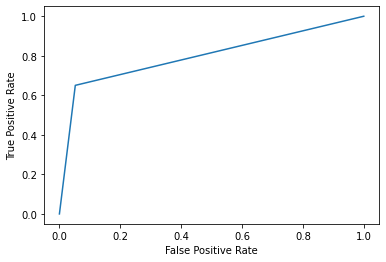

In [21]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_DNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy with DNN classifier model = ', metrics.accuracy_score(y_predicted_class_DNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_predicted_class_DNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_predicted_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_predicted_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_predicted_class_DNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_predicted_class_DNN, y2, average='macro'))

Accuracy with DNN classifier model =  77.85220014194464
Confusion Matrix = [[9204 4486]
 [ 507 8347]]
Recall = 0.7785220014194464
Precision = 0.831005598437192
Classification Report =
               precision    recall  f1-score   support

           0       0.95      0.67      0.79     13690
           1       0.65      0.94      0.77      8854

    accuracy                           0.78     22544
   macro avg       0.80      0.81      0.78     22544
weighted avg       0.83      0.78      0.78     22544

F1 Score =  0.7782014790548115


<AxesSubplot:>

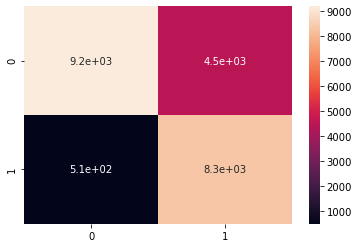

In [23]:
cm_DNN = metrics.confusion_matrix(y_predicted_class_DNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_DNN, annot=True)

<AxesSubplot:>

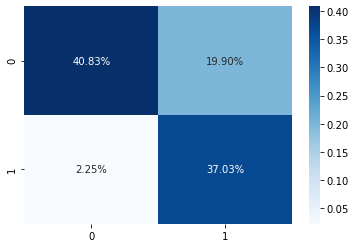

In [24]:
sns.heatmap(cm_DNN/np.sum(cm_DNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [25]:
# 3. CNN CLASSIFIER MODEL

x1_CNN = np.reshape(x1, (x1.shape[0],x1.shape[1],1))
x2_CNN = np.reshape(x2, (x2.shape[0],x2.shape[1],1))

In [26]:
from tensorflow import keras
from tensorflow.keras.layers import Input
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
convnet=keras.models.Sequential()
convnet.add(keras.layers.Convolution1D(40,3,activation="relu",input_shape=(40,1)))
convnet.add(keras.layers.Convolution1D(80,3,activation="relu"))
convnet.add(keras.layers.BatchNormalization())
convnet.add(keras.layers.MaxPooling1D(2,2))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Flatten())
convnet.add(keras.layers.Dense(160,activation="relu"))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Dense(2,activation="softmax"))
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 40)            160       
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 80)            9680      
                                                                 
 batch_normalization (BatchN  (None, 36, 80)           320       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 80)           0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 18, 80)            0         
                                                                 
 flatten (Flatten)           (None, 1440)             

In [27]:
opt = keras.optimizers.Adam(learning_rate=0.01)
convnet.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaConvNet.h5",monitor='val_loss')
history = convnet.fit(x1_CNN,y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [x2_CNN, y2])
testloss,testaccuracy=convnet.evaluate(x2_CNN,y2)
print("Test Loss =",testloss)
print("Test Accuracy =",testaccuracy)

Epoch 1/50
8418/8418 [==============================] - 75s 9ms/step - loss: 0.0944 - accuracy: 0.9665 - val_loss: 1.3284 - val_accuracy: 0.7516
Epoch 2/50
8418/8418 [==============================] - 72s 9ms/step - loss: 0.0820 - accuracy: 0.9662 - val_loss: 0.9655 - val_accuracy: 0.7416
Epoch 3/50
8418/8418 [==============================] - 72s 9ms/step - loss: 0.0832 - accuracy: 0.9644 - val_loss: 4.1639 - val_accuracy: 0.7467
Epoch 4/50
8418/8418 [==============================] - 74s 9ms/step - loss: 0.0821 - accuracy: 0.9640 - val_loss: 2.1452 - val_accuracy: 0.7226
Epoch 5/50
8418/8418 [==============================] - 72s 9ms/step - loss: 0.0891 - accuracy: 0.9623 - val_loss: 2.2223 - val_accuracy: 0.7311
Epoch 6/50
8418/8418 [==============================] - 73s 9ms/step - loss: 0.0862 - accuracy: 0.9650 - val_loss: 3.3273 - val_accuracy: 0.7420
Epoch 7/50
8418/8418 [==============================] - 77s 9ms/step - loss: 0.0938 - accuracy: 0.9641 - val_loss: 2.7896 - val_ac

In [28]:
y_predicted_CNN = convnet.predict(x2_CNN)
print(y_predicted_CNN)
y_predicted_class_CNN=np.argmax(y_predicted_CNN,axis=1)
print(y_predicted_class_CNN)

[[0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [7.9246795e-01 2.0753203e-01]
 ...
 [5.1274061e-01 4.8725936e-01]
 [1.0000000e+00 1.9560933e-20]
 [2.0840893e-17 1.0000000e+00]]
[1 1 0 ... 0 0 1]


In [29]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_predicted_class_CNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.765618


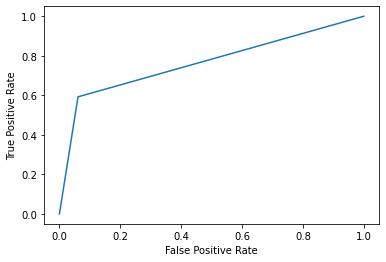

In [30]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_CNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy with CNN classifier model = ', metrics.accuracy_score(y_predicted_class_CNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_predicted_class_CNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_predicted_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_predicted_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_predicted_class_CNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_predicted_class_CNN, y2, average='macro'))

Accuracy with CNN classifier model =  74.16163946061036
Confusion Matrix = [[9118 5232]
 [ 593 7601]]
Recall = 0.7416163946061036
Precision = 0.8129451617330731
Classification Report =
               precision    recall  f1-score   support

           0       0.94      0.64      0.76     14350
           1       0.59      0.93      0.72      8194

    accuracy                           0.74     22544
   macro avg       0.77      0.78      0.74     22544
weighted avg       0.81      0.74      0.75     22544

F1 Score =  0.7404411043713666


<AxesSubplot:>

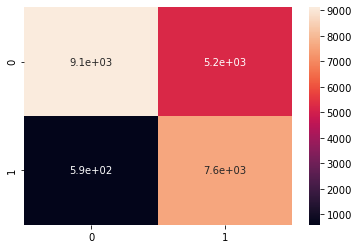

In [32]:
cm_CNN = metrics.confusion_matrix(y_predicted_class_CNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_CNN, annot=True)

<AxesSubplot:>

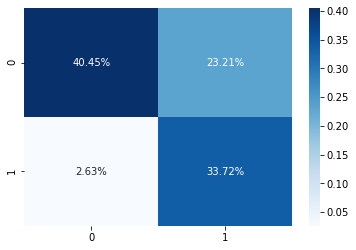

In [33]:
sns.heatmap(cm_CNN/np.sum(cm_CNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [34]:
# 4. TCN CLASSIFIER MODEL

print(x1.shape[0])
print(x2.shape[0])

134686
22544


In [35]:
print(x1.shape, y1.shape, x2.shape, y2.shape)
x1_TCN = np.reshape(x1, (x1.shape[0],x1.shape[1],1))
x2_TCN = np.reshape(x2, (x2.shape[0],x2.shape[1],1))
print(x1_TCN.shape, y1.shape, x2_TCN.shape, y2.shape)

(134686, 40) (134686,) (22544, 40) (22544,)
(134686, 40, 1) (134686,) (22544, 40, 1) (22544,)


In [36]:
from tensorflow.keras.utils import to_categorical
num_classes = 2
y1_TCN = to_categorical(y1, num_classes)
y2_TCN = to_categorical(y2, num_classes)
print(x1_TCN.shape, y1_TCN.shape, x2_TCN.shape, y2_TCN.shape)

(134686, 40, 1) (134686, 2) (22544, 40, 1) (22544, 2)


In [37]:
y1_TCN = np.expand_dims(y1_TCN, axis=2)
y2_TCN = np.expand_dims(y2_TCN, axis=2)
print(x1_TCN.shape, y1_TCN.shape, x2_TCN.shape, y2_TCN.shape)

(134686, 40, 1) (134686, 2, 1) (22544, 40, 1) (22544, 2, 1)


In [38]:
!pip install keras-tcn

In [39]:
import numpy as np
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tcn import compiled_tcn

In [40]:
model_TCN = compiled_tcn(return_sequences = False,num_feat = 1, num_classes = 2, nb_filters = 64,kernel_size=6,
                    dilations=[1,2,4,8,16,32,64],nb_stacks=1, opt='adam',lr=0.002,activation = 'relu',kernel_initializer = 
                    'he_normal',use_batch_norm=True,use_layer_norm = False,use_weight_norm = False,max_len=x1_TCN[0:1].shape[1],
                     use_skip_connections=True) 

x.shape= (None, 64)
model.x = (None, 40, 1)
model.y = (None, 2)


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [41]:
print(x1_TCN[0:1].shape[1])

40


In [42]:
print(f'x_train.shape = {x1_TCN.shape}')
print(f'y_train.shape = {y1_TCN.shape}')
print(f'x_test.shape = {x2_TCN.shape}')
print(f'y_test.shape = {y2_TCN.shape}')

x_train.shape = (134686, 40, 1)
y_train.shape = (134686, 2, 1)
x_test.shape = (22544, 40, 1)
y_test.shape = (22544, 2, 1)


In [43]:
model_TCN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 tcn (TCN)                   (None, 64)                324480    
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 324,610
Trainable params: 322,818
Non-trainable params: 1,792
_________________________________________________________________


In [44]:
y1_TCN = y1_TCN.squeeze().argmax(axis=1)
y2_TCN = y2_TCN.squeeze().argmax(axis=1)

In [45]:
history = model_TCN.fit(x1_TCN, y1_TCN, epochs = 10, validation_data = [x2_TCN, y2_TCN], workers=4, use_multiprocessing=True)

Epoch 1/10
4209/4209 [==============================] - 926s 216ms/step - loss: 0.0535 - accuracy: 0.9818 - val_loss: 0.8318 - val_accuracy: 0.7693
Epoch 2/10
4209/4209 [==============================] - 844s 201ms/step - loss: 0.0276 - accuracy: 0.9900 - val_loss: 1.0510 - val_accuracy: 0.7645
Epoch 3/10
4209/4209 [==============================] - 863s 205ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 1.1269 - val_accuracy: 0.8028
Epoch 4/10
4209/4209 [==============================] - 846s 201ms/step - loss: 0.0154 - accuracy: 0.9946 - val_loss: 1.0741 - val_accuracy: 0.7780
Epoch 5/10
4209/4209 [==============================] - 861s 204ms/step - loss: 0.0134 - accuracy: 0.9952 - val_loss: 1.4774 - val_accuracy: 0.7733
Epoch 6/10
4209/4209 [==============================] - 822s 195ms/step - loss: 0.0123 - accuracy: 0.9956 - val_loss: 1.3878 - val_accuracy: 0.7800
Epoch 7/10
4209/4209 [==============================] - 824s 196ms/step - loss: 0.0113 - accuracy: 0.9959 - val_

In [46]:
result = model_TCN.evaluate(x2_TCN, y2_TCN)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")

705/705 [==============================] - 42s 60ms/step - loss: 1.4137 - accuracy: 0.7842
Accuracy : 78.42 %
Loss : 141.37 %


In [47]:
y_pred_TCN = model_TCN.predict(x2_TCN, verbose=0)
print(np.argmax(y_pred_TCN, axis=1))
y_pred_class_TCN=np.argmax(y_pred_TCN,axis=1)
print(y_pred_class_TCN)

[1 1 0 ... 1 0 1]
[1 1 0 ... 1 0 1]


In [48]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_TCN, y_pred_class_TCN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.801982


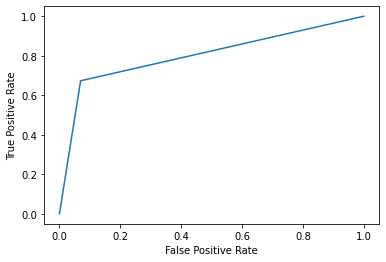

In [49]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy with TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_TCN, y2_TCN, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_TCN, y2_TCN, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_TCN, y2_TCN, average='macro'))

Accuracy with TCN classifier model =  78.41997870830376
Confusion Matrix = [[9035 4189]
 [ 676 8644]]
Recall = 0.7841997870830376
Precision = 0.8242184860028797
Classification Report =
               precision    recall  f1-score   support

           0       0.93      0.68      0.79     13224
           1       0.67      0.93      0.78      9320

    accuracy                           0.78     22544
   macro avg       0.80      0.81      0.78     22544
weighted avg       0.82      0.78      0.78     22544

F1 Score =  0.7841348527937252


<AxesSubplot:>

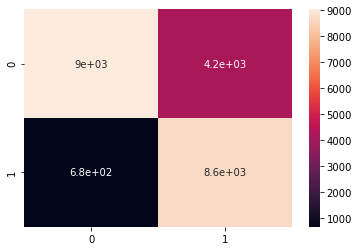

In [51]:
cm_TCN = metrics.confusion_matrix(y_pred_class_TCN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TCN, annot=True)

<AxesSubplot:>

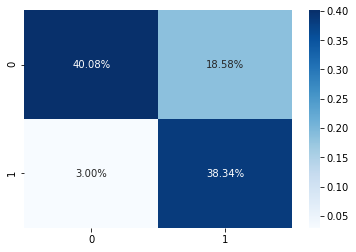

In [52]:
sns.heatmap(cm_TCN/np.sum(cm_TCN), annot=True, 
            fmt='.2%', cmap='Blues')

In [53]:
# 5. TabNet CLASSIFIER MODEL

print("X train shape: ", x1.shape)
print("X test shape: ", x2.shape)
print("Y train shape: ", y1.shape)
print("Y test shape: ", y2.shape)

X train shape:  (134686, 40)
X test shape:  (22544, 40)
Y train shape:  (134686,)
Y test shape:  (22544,)


In [54]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [55]:
# define the model
model_tabnet = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=5e-2),
                       scheduler_params={"step_size":10,"gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax')

Device used : cpu


In [56]:
# fit the model 
model_tabnet.fit(x1,y1, eval_set=[(x1, y1), (x2, y2)],eval_name=['train', 'valid'],
                   eval_metric=['auc','accuracy'],
                   max_epochs=20 , patience=50, batch_size=256, virtual_batch_size=128, num_workers=0, weights=1,
                   drop_last=False)    

epoch 0  | loss: 0.0745  | train_auc: 0.99788 | train_accuracy: 0.98113 | valid_auc: 0.81597 | valid_accuracy: 0.7913  |  0:00:48s
epoch 1  | loss: 0.04557 | train_auc: 0.99895 | train_accuracy: 0.98748 | valid_auc: 0.91102 | valid_accuracy: 0.7885  |  0:01:35s
epoch 2  | loss: 0.03655 | train_auc: 0.98791 | train_accuracy: 0.96522 | valid_auc: 0.78378 | valid_accuracy: 0.75169 |  0:02:24s
epoch 3  | loss: 0.04077 | train_auc: 0.99808 | train_accuracy: 0.95648 | valid_auc: 0.89344 | valid_accuracy: 0.85242 |  0:03:11s
epoch 4  | loss: 0.0386  | train_auc: 0.999   | train_accuracy: 0.98997 | valid_auc: 0.89828 | valid_accuracy: 0.77249 |  0:03:59s
epoch 5  | loss: 0.04025 | train_auc: 0.99929 | train_accuracy: 0.98961 | valid_auc: 0.95934 | valid_accuracy: 0.79879 |  0:04:47s
epoch 6  | loss: 0.03155 | train_auc: 0.99952 | train_accuracy: 0.99061 | valid_auc: 0.96228 | valid_accuracy: 0.81002 |  0:05:35s
epoch 7  | loss: 0.03247 | train_auc: 0.99957 | train_accuracy: 0.99158 | valid_auc

Text(0, 0.5, 'Feature index')

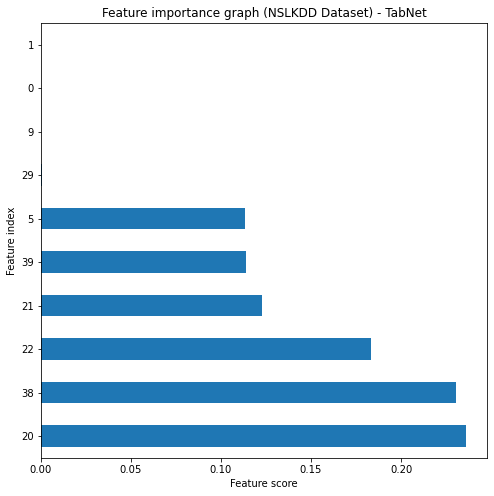

In [66]:
# find and plot feature importance
from IPython.core.pylabtools import figsize
figsize(8, 8)
model_tabnet.feature_importances_
feat_importances = pd.Series(model_tabnet.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importance graph (NSLKDD Dataset) - TabNet")
plt.xlabel("Feature score")
plt.ylabel("Feature index")

In [58]:
y_pred_TabNet = model_tabnet.predict(x2)
print(y_pred_TabNet)

[1 1 0 ... 1 0 1]


In [59]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_TabNet)
print('ROC AUC: %f' % auc)

ROC AUC: 0.876008


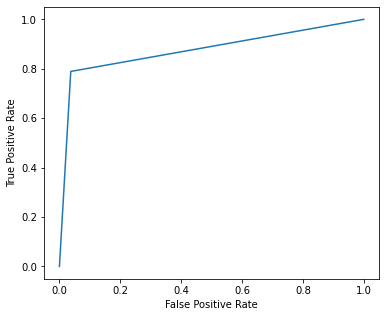

In [67]:
from IPython.core.pylabtools import figsize
figsize(6, 5)
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
test_acc = accuracy_score(y_pred_TabNet, y2)
print("Accuracy in TabNet classifier model:",test_acc*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_TabNet, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_TabNet, y2, average='macro'))

Accuracy in TabNet classifier model: 86.3999290276792
Confusion Matrix = [[ 9349  2704]
 [  362 10129]]
Recall = 0.863999290276792
Precision = 0.8820161368349104
Classification Report =
               precision    recall  f1-score   support

           0       0.96      0.78      0.86     12053
           1       0.79      0.97      0.87     10491

    accuracy                           0.86     22544
   macro avg       0.88      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544

F1 Score =  0.8638362898918068


<AxesSubplot:>

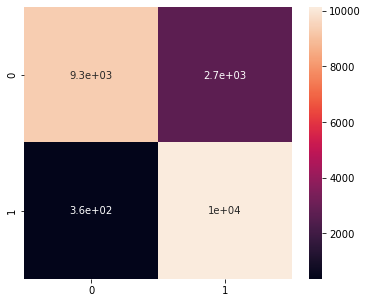

In [68]:
cm_TabNet = metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TabNet, annot=True)

<AxesSubplot:>

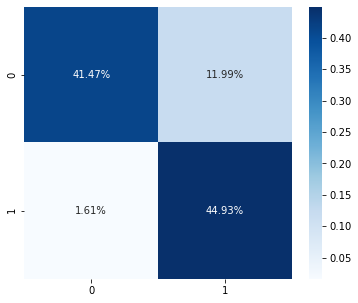

In [69]:
sns.heatmap(cm_TabNet/np.sum(cm_TabNet), annot=True, 
            fmt='.2%', cmap='Blues')

In [64]:
print("Number of selected features=%d" % (x1.shape[1]))
print('Accuracy result of all models:')
print('Accuracy in XGBoost classifier model = ', metrics.accuracy_score(y2, y_pred_xgb)*100)
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_predicted_class_DNN, y2)*100)
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_predicted_class_CNN, y2)*100)
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Accuracy in TabNet classifier model:",test_acc*100)

Number of selected features=40
Accuracy result of all models:
Accuracy in XGBoost classifier model =  79.79063165365507
Accuracy in DNN classifier model =  77.85220014194464
Accuracy in CNN classifier model =  74.16163946061036
Accuracy in TCN classifier model =  78.41997870830376
Accuracy in TabNet classifier model: 86.3999290276792


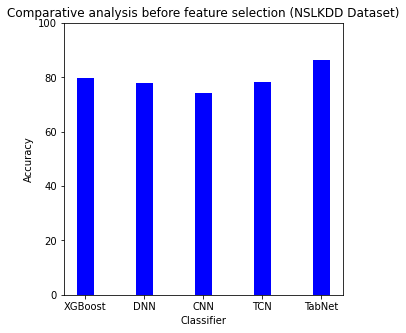

In [70]:
data = {'XGBoost':79.79, 'DNN':77.85, 'CNN':74.16,
        'TCN':78.42, 'TabNet':86.39}
Classifier_model = list(data.keys())
Classifier_accuracy = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Classifier_model, Classifier_accuracy, color ='blue',
        width = 0.3)
plt.ylim(0, 100)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparative analysis before feature selection (NSLKDD Dataset)")
plt.show()

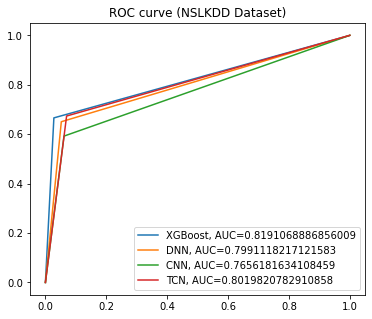

In [71]:
#set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_xgb)
auc = roc_auc_score(y2, y_pred_xgb)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_DNN)
auc = roc_auc_score(y2, y_predicted_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_CNN)
auc = roc_auc_score(y2, y_predicted_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

#add legend
plt.title("ROC curve (NSLKDD Dataset)")
plt.legend()

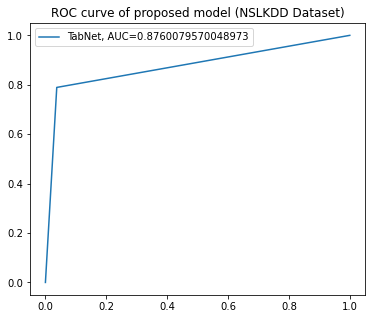

In [72]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))
#add legend
plt.title("ROC curve of proposed model (NSLKDD Dataset)")
plt.legend()

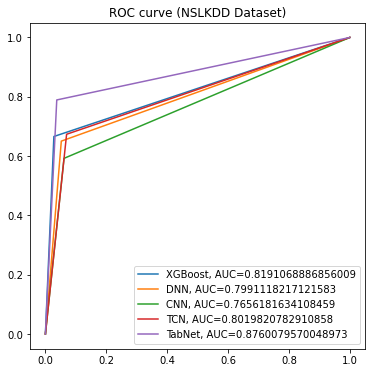

In [78]:
#set up plotting area
from IPython.core.pylabtools import figsize
figsize(6, 6)
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_xgb)
auc = roc_auc_score(y2, y_pred_xgb)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_DNN)
auc = roc_auc_score(y2, y_predicted_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_CNN)
auc = roc_auc_score(y2, y_predicted_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))

#add legend
plt.title("ROC curve (NSLKDD Dataset)")
plt.legend()

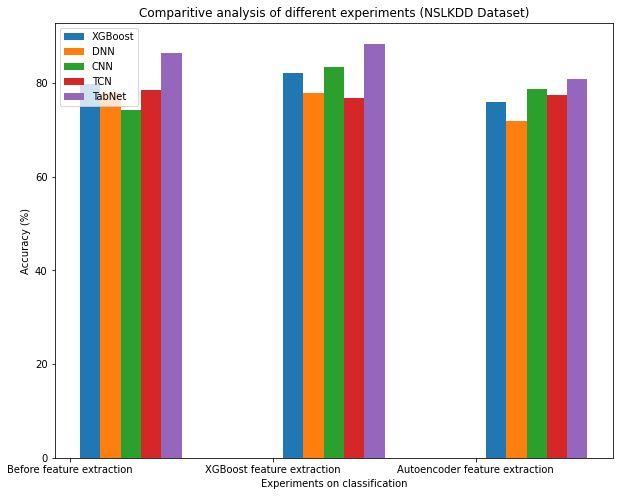

In [74]:
from IPython.core.pylabtools import figsize
figsize(10, 8)
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Before feature extraction','XGBoost feature extraction','Autoencoder feature extraction']
xvals = [79.79,82.10,75.94]
yvals = [77.85,77.72,71.77]
zvals = [74.16,83.40,78.67]
avals = [78.42,76.77,77.44]
bvals = [86.39,88.35,80.84]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.1, label = 'XGBoost')
plt.bar(x_axis +0.1*2, yvals, width=0.1, label = 'DNN')
plt.bar(x_axis +0.1*3, zvals, width=0.1, label = 'CNN')
plt.bar(x_axis +0.1*4, avals, width=0.1, label = 'TCN')
plt.bar(x_axis +0.1*5, bvals, width=0.1, label = 'TabNet')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification")
plt.title("Comparitive analysis of different experiments (NSLKDD Dataset)")
plt.legend()
plt.show()